<a href="https://colab.research.google.com/github/rinutresamj/DeepLearning/blob/main/ANN_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston house price prediction using ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from tensorflow.keras import layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
from sklearn import datasets
boston_housing=datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston_housing)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
print(boston_housing.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(boston_housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston=pd.DataFrame(boston_housing.data,columns=boston_housing.feature_names)

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
boston[boston['CRIM']>6.2].CRIM.nunique()

92

In [ ]:
boston[boston['ZN']>24].ZN.nunique()

19

In [ ]:
boston[(boston['ZN']>24)&(boston['CRIM']>6.2)].CRIM.nunique()

0

In [ ]:
boston['Price']=boston_housing.target

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

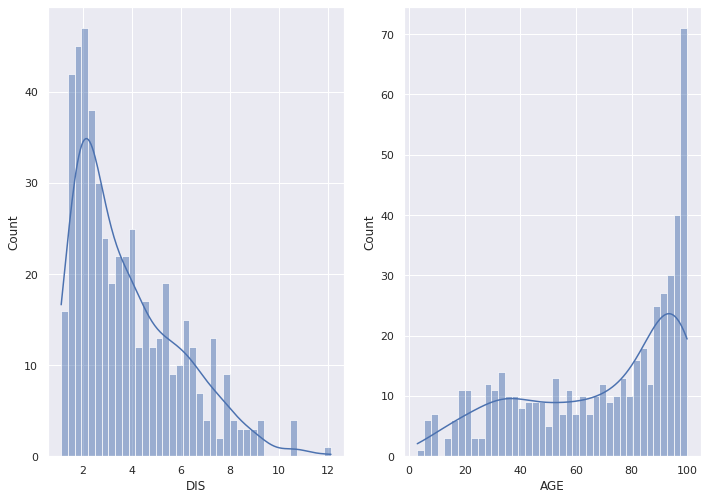

In [ ]:
#sns.set(rc= {'figure.figsize':(15:10)})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1,2,1)
sns.histplot(boston['DIS'],bins=40,kde=True)
#plt.show()
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(1,2,2)
sns.histplot(boston['AGE'],bins=40,kde=True)
plt.show()

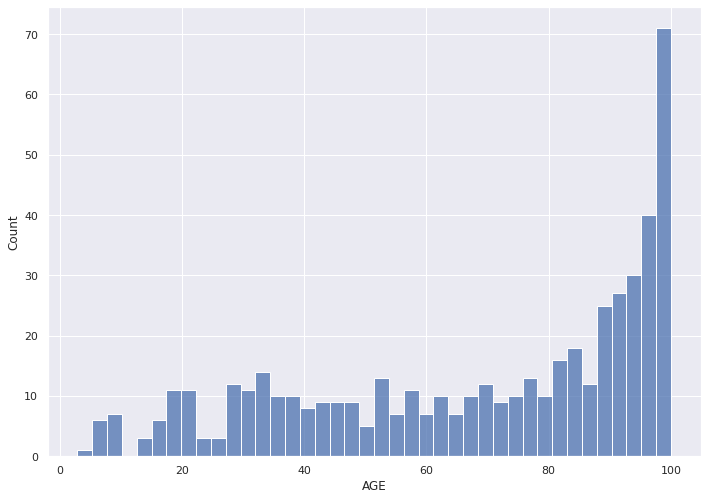

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston['AGE'],bins=40)
plt.show()

By combining these 2 graphs majority of the people are older people and they choose to live in nearby employment centers.

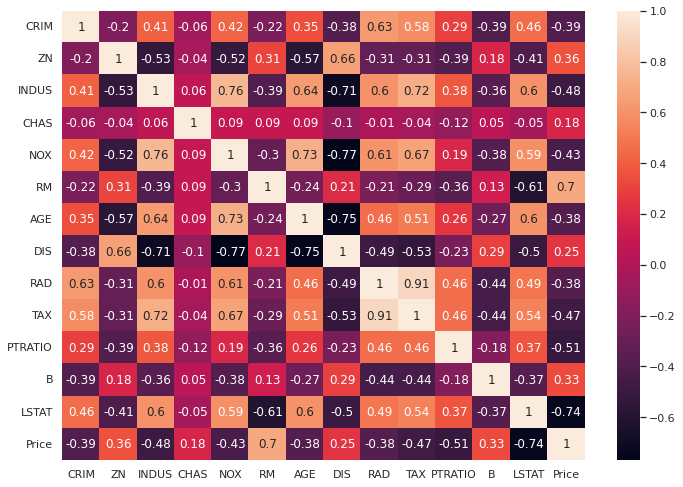

In [ ]:
correlation=boston.corr().round(2)
sns.heatmap(data=correlation,annot=True)

In [ ]:
x=boston_housing.data
y=boston_housing.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
train_x=preprocessing.normalize(X_train)
test_x=preprocessing.normalize(X_test)

In [ ]:
network=tf.keras.Sequential()
network.add(layers.Dense(128,activation='relu',input_shape=(13,)))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(32,activation='relu'))
network.add(layers.Dense(1))


In [ ]:
network.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01),loss='mse',metrics=['mae'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history=network.fit(train_x,y_train,validation_data=(test_x,y_test),batch_size=1,epochs=200)

Epoch 1/200
404/404 [==============================] - 2s 3ms/step - loss: 97.0230 - mae: 6.9659 - val_loss: 69.4202 - val_mae: 5.9288
Epoch 2/200
404/404 [==============================] - 1s 2ms/step - loss: 72.9610 - mae: 6.0394 - val_loss: 46.9904 - val_mae: 5.5127
Epoch 3/200
404/404 [==============================] - 1s 2ms/step - loss: 70.1049 - mae: 5.8397 - val_loss: 39.0559 - val_mae: 4.7279
Epoch 4/200
404/404 [==============================] - 1s 2ms/step - loss: 64.9413 - mae: 5.5562 - val_loss: 42.0243 - val_mae: 4.5770
Epoch 5/200
404/404 [==============================] - 1s 2ms/step - loss: 58.8584 - mae: 5.3599 - val_loss: 36.3064 - val_mae: 4.2492
Epoch 6/200
404/404 [==============================] - 1s 2ms/step - loss: 58.6273 - mae: 5.3340 - val_loss: 31.4674 - val_mae: 4.1294
Epoch 7/200
404/404 [==============================] - 1s 2ms/step - loss: 52.2836 - mae: 4.9739 - val_loss: 49.4757 - val_mae: 5.0647
Epoch 8/200
404/404 [==============================] - 

In [ ]:
pred=network.predict(np.reshape(test_x[0],(-1,13)))

1/1 [==============================] - 0s 110ms/step


In [ ]:
vals=[]
for i in range(0,y_test.__len__()):
  val =network.predict(np.reshape(test_x[0],(-1,13)))
  vals.append(val[0][0])

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(vals)

[22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671, 22.018671

In [ ]:
Y=vals

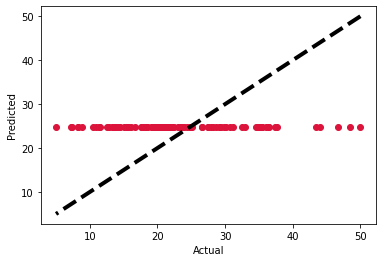

In [ ]:
fig,ax=plt.subplots()
ax.scatter(y_test,vals,c="crimson")
p1=max(max(y_test),max(vals))
p2=min(min(y_test),min(vals))
ax.plot([p1,p2],[p1,p2],'k--',lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()